# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

In [182]:
#%%pycodestyle


class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init

    def init_centroids(self, X, y=None):
        if self.init == 'random':
            self.centroid = X[np.random.choice(X.shape[0], self.k)]
        elif self.init == 'k-means':
            self.centroid[0] = X[np.random.choice(X.shape[0])]

            X_sqr = (X ** 2).sum(axis=1)
            for i in range(1, self.k):
                dist = X_sqr.reshape(-1, 1) - 2 * X.dot(self.centroid[:i].T) +\
                      (self.centroid[:i] ** 2).sum(axis=1)
                dist = np.min(dist, axis=1)
                self.centroid[i] = X[np.random.choice(X.shape[0],
                                                      size=1,
                                                      p=abs(dist/dist.sum()))]

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroid = np.empty((self.k, X.shape[1]))

        # Your Code Here
        self.init_centroids(X)
        centroid = np.empty((self.k, X.shape[1]))
        eps = 0.00001
        for i in range(self.max_iter):
            self.labels = self.predict(X)
            for i in range(self.k):
                centroid[i] = (X[self.labels == i, :]).mean(axis = 0)
            if ((centroid - self.centroid) ** 2).sum() < eps:
                return self
            self.centroid = centroid
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        x_dist = (X ** 2).sum(axis=1)
        centr_dist = (self.centroid ** 2).sum(axis=1).reshape(-1, 1)
        dist = x_dist + centr_dist - 2 * self.centroid.dot(X.T)
        return np.argmin(dist, axis=0)

class MiniBatchKMeans(MyKmeans):

    def __init__(self, k=2, metric='euclidean', max_iter=100,
                 random_state=None, init='random', batch_size=100):

        MyKmeans.__init__(self, k, metric, max_iter, random_state, init)
        self.batch_size = batch_size

    def fit(self, X):
        np.random.seed(self.random_state)
        self.labels = np.empty(X.shape[0])
        self.centroid = np.empty((self.k, X.shape[1]))

        self.init_centroids(X)
        eps = 0.00001
        centroid = np.empty((self.k, X.shape[1]))

        for i in range(self.max_iter):
            np.random.shuffle(X)
            batch = X[:self.batch_size]
            self.labels = self.predict(batch)
            for i in range(self.k):
                if self.labels[self.labels == i].shape[0] != 0:
                    centroid[i] = (batch[self.labels == i, :]).mean(axis=0)
            if np.sum((centroid - self.centroid) ** 2) < eps:
                return self
            self.centroid = centroid
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [161]:
from sklearn.datasets import make_blobs

In [162]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

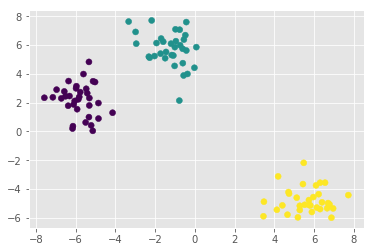

In [163]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [298]:
def clasters(clust):
    clust.fit(X)
    y = clust.predict(X)
    plt.scatter(X[:,0], X[:, 1], c=y)

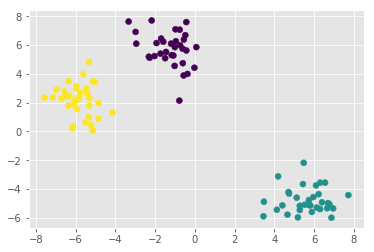

In [331]:
## Работоспособность MyKmeans
clasters(MyKmeans(k=3))

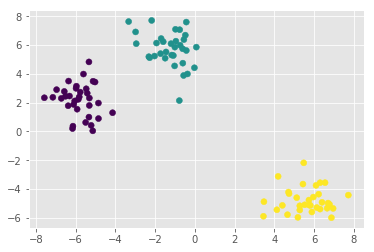

In [348]:
## Работоспособность MyKmeans++
clasters(MyKmeans(k=3, init='k-means'))

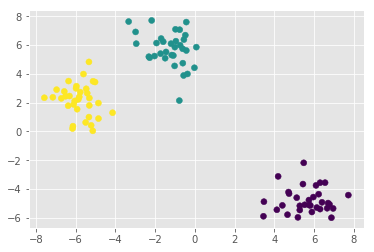

In [300]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
clasters(MiniBatchKMeans(k=3))

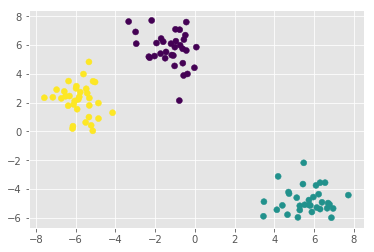

In [349]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
clasters(MiniBatchKMeans(k=3, init="k-means"))

In [98]:
import time

In [129]:
def work_time(clust):
    tm = []
    n_samples_ = [100, 500, 1000, 2500, 5000, 10000, 50000]
    for n in n_samples_:
        X, y = make_blobs(n_samples=n, n_features=3, centers=4, cluster_std=1, 
               center_box=(-15.0, 15.0), shuffle=False, random_state=1234)
        start = time.time()
        clust.fit(X)
        finish = time.time()
        tm.append(finish - start)
    plt.plot(n_samples_, tm)
    plt.xlabel('n_samples')
    plt.ylabel('time')

In [130]:
## Время выполнения алгоритма Kmeans из sklearn


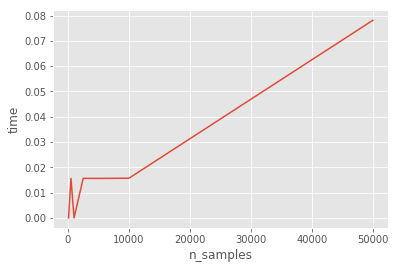

In [165]:
## Время выполнения алгоритма MyKmeans
work_time(MyKmeans(k=4))

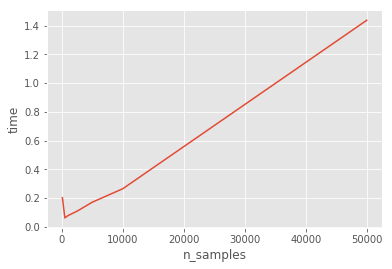

In [135]:
## Время выполнения алгоритма MyKmeans++
from sklearn.cluster import KMeans
work_time(KMeans(n_clusters=4))

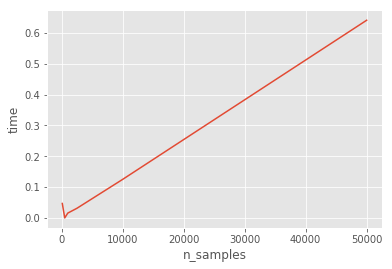

In [166]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
work_time(MiniBatchKMeans(k=4, batch_size=100))

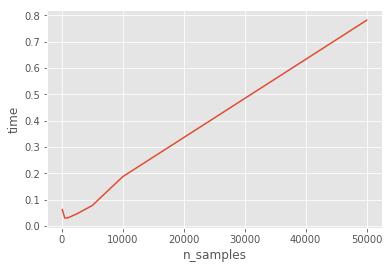

In [168]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
work_time(MiniBatchKMeans(k=4, batch_size=100, init='k-means'))

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [169]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [170]:
X = df_sns.drop(df_sns.columns[:4], axis=1)
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [171]:
def clusters(clust):
    clust.fit(X.values)
    X_ = X
    X_.loc[:, 'label'] = clust.predict(X.values)
    X_words = X_.iloc[:, :]
    clusters = X_words.groupby('label').mean()
    for i in range(9):
        print('='*10 + '\n')
        print('cluster label {}'.format(i))
        print(clusters.loc[i].abs().sort_values(ascending = False).head(5))

In [172]:
## MyKMeans
%time clusters(MyKmeans(k=9))


cluster label 0
abercrombie    4.376551
hollister      2.049202
shopping       0.497908
hair           0.273833
hot            0.266948
Name: 0, dtype: float64

cluster label 1
god       3.272426
bible     2.843399
jesus     2.817613
church    2.149602
die       0.300695
Name: 1, dtype: float64

cluster label 2
music       0.330306
hair        0.255564
sexy        0.231422
shopping    0.230958
death       0.215947
Name: 2, dtype: float64

cluster label 3
music       0.971930
band        0.699366
marching    0.595311
rock        0.222909
drunk       0.222242
Name: 3, dtype: float64

cluster label 4
hollister    2.899932
mall         2.523948
clothes      2.245328
shopping     1.733954
hair         1.670506
Name: 4, dtype: float64

cluster label 5
basketball    2.523720
sports        1.803949
baseball      1.599469
football      1.285350
hair          1.069089
Name: 5, dtype: float64

cluster label 6
sexy          2.051115
volleyball    1.124164
hot           0.337705
cute          0.26

In [173]:
## MyKMeans++
%time clusters(MyKmeans(k=9, init='k-means'))


cluster label 0
sexy            0.833400
death           0.733127
cheerleading    0.557640
volleyball      0.371181
dance           0.361844
Name: 0, dtype: float64

cluster label 1
mall         4.869314
shopping     1.394373
hollister    1.030970
cute         0.965359
clothes      0.831487
Name: 1, dtype: float64

cluster label 2
soccer        5.906890
shopping      0.350345
swimming      0.350044
basketball    0.265568
sports        0.240991
Name: 2, dtype: float64

cluster label 3
softball      5.522601
volleyball    0.725721
basketball    0.724787
sports        0.438360
baseball      0.270970
Name: 3, dtype: float64

cluster label 4
kissed     2.650044
hair       2.048876
clothes    1.753277
sex        1.675862
dress      1.610320
Name: 4, dtype: float64

cluster label 5
bible     10.904440
jesus      7.908722
god        6.593484
church     1.714563
death      0.659497
Name: 5, dtype: float64

cluster label 6
sports        0.284271
sexy          0.214327
death         0.200908
hai

In [174]:
## MyKMeans с MiniBatchMyKMeans
%time clusters(MiniBatchKMeans(k=9, batch_size = 100))


cluster label 0
hair      4.565726
sex       4.065500
kissed    3.525665
music     3.141765
die       2.779370
Name: 0, dtype: float64

cluster label 1
soccer       7.298639
sports       0.504651
shopping     0.466112
god          0.416817
hollister    0.400158
Name: 1, dtype: float64

cluster label 2
abercrombie    1.027786
cute           0.934266
sports         0.815484
hollister      0.446425
kissed         0.351312
Name: 2, dtype: float64

cluster label 3
band        4.339288
marching    3.717371
kissed      1.358089
rock        1.079728
sports      1.031302
Name: 3, dtype: float64

cluster label 4
softball      6.304857
basketball    0.902318
volleyball    0.549106
sports        0.548278
church        0.463302
Name: 4, dtype: float64

cluster label 5
tennis        5.095870
dress         4.790854
basketball    1.578713
shopping      0.821536
dance         0.790636
Name: 5, dtype: float64

cluster label 6
sexy            0.735649
death           0.660808
cheerleading    0.513247
ma

In [184]:
## MyKMeans++ с MiniBatchMyKMeans
%time clusters(MiniBatchKMeans(k=9, init='k-means'))


cluster label 0
hair        0.150490
baseball    0.126694
kissed      0.097535
drugs       0.095146
hot         0.091983
Name: 0, dtype: float64

cluster label 1
hair       2.477411
drugs      1.669030
kissed     1.635630
drunk      1.407124
clothes    1.212565
Name: 1, dtype: float64

cluster label 2
volleyball    3.425642
swimming      2.895645
hot           1.671503
football      1.334153
soccer        1.255804
Name: 2, dtype: float64

cluster label 3
sexy     4.707981
cute     3.799821
mall     1.613541
hair     1.473129
death    1.341054
Name: 3, dtype: float64

cluster label 4
die      27.887037
death     2.485754
dance     1.526641
hair      1.072385
rock      1.050379
Name: 4, dtype: float64

cluster label 5
baseball     3.594811
hot          1.998877
football     0.706467
jesus        0.599635
hollister    0.581139
Name: 5, dtype: float64

cluster label 6
tennis        9.751529
sports        0.485583
basketball    0.403681
shopping      0.399588
church        0.392376
Name: 6

In [ ]:
## Вывод
На данном примере лучшее время у обычного KMeans